<a href="https://colab.research.google.com/github/akkkiii08/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convulation Neural Network**


### What is Convulation Neural Network (CNNs) ?

A Convolutional Neural Network (CNN) represents a sophisticated form of deep learning model primarily employed for tasks such as image recognition. Its core functionality revolves around learning to identify intricate patterns within images by employing specialized layers known as convolutional layers. These layers utilize filters to systematically analyze the input image, detecting essential features like edges, textures, and shapes.

As data progresses through successive layers, the CNN becomes adept at discerning increasingly complex patterns. Additionally, CNN architectures incorporate pooling layers, which serve to condense the data dimensionality, enhancing computational efficiency. Ultimately, fully connected layers situated towards the network's end utilize the acquired features to classify images into predefined categories.

CNNs are prized for their ability to autonomously and dynamically acquire spatial hierarchies of features from input images, making them exceptionally potent for a variety of visual recognition tasks

## 1. Importing the Libraries



In [2]:
!pip install torch==1.13.1 torchvision==0.14.1

In [1]:
!pip install numpy==1.23.5

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


## 2. Loading and Preprocessing the Data

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



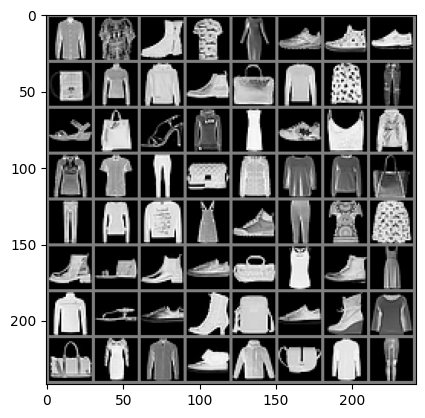

Shirt Shirt Ankle boot T-shirt/top Dress Sneaker Sneaker Sneaker


In [4]:
# Transformations for the training and testing sets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training and test sets
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Classes in the dataset
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Visualize some training images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))


## 3. Defining the CNN model

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return nn.LogSoftmax(dim=1)(x)

net = Net()


## 4. Defining the Loss Function and Optimizer

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


## 5. Training the Model

In [ ]:
# Number of epochs
EPOCHS = 10

for epoch in range(EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Optimize
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1, Batch 100, Loss: 0.901
Epoch 1, Batch 200, Loss: 0.574
Epoch 1, Batch 300, Loss: 0.522
Epoch 1, Batch 400, Loss: 0.474
Epoch 1, Batch 500, Loss: 0.435
Epoch 1, Batch 600, Loss: 0.426
Epoch 1, Batch 700, Loss: 0.444
Epoch 1, Batch 800, Loss: 0.388
Epoch 1, Batch 900, Loss: 0.394
Epoch 2, Batch 100, Loss: 0.363
Epoch 2, Batch 200, Loss: 0.350
Epoch 2, Batch 300, Loss: 0.354
Epoch 2, Batch 400, Loss: 0.347
Epoch 2, Batch 500, Loss: 0.340
Epoch 2, Batch 600, Loss: 0.328
Epoch 2, Batch 700, Loss: 0.306
Epoch 2, Batch 800, Loss: 0.321
Epoch 2, Batch 900, Loss: 0.329
Epoch 3, Batch 100, Loss: 0.291
Epoch 3, Batch 200, Loss: 0.306
Epoch 3, Batch 300, Loss: 0.300
Epoch 3, Batch 400, Loss: 0.298
Epoch 3, Batch 500, Loss: 0.290
Epoch 3, Batch 600, Loss: 0.292
Epoch 3, Batch 700, Loss: 0.283
Epoch 3, Batch 800, Loss: 0.271
Epoch 3, Batch 900, Loss: 0.267
Epoch 4, Batch 100, Loss: 0.270
Epoch 4, Batch 200, Loss: 0.266
Epoch 4, Batch 300, Loss: 0.260
Epoch 4, Batch 400, Loss: 0.255
Epoch 4,

## 6. Compiling the Model

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10,000 test images: 90.38%


## 8. Visualizing Test Results

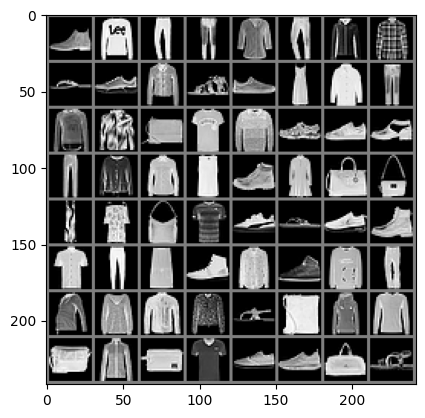

GroundTruth:  Ankle boot Pullover Trouser Trouser Shirt Trouser  Coat Shirt
Predicted:  Ankle boot Pullover Trouser Trouser Shirt Trouser  Coat Shirt


In [9]:
# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

# Print predicted labels
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(8)))


## Conclusion:
This project demonstrates the basics of using CNNs for image classification with PyTorch.
 Loaded and preprocessed the FashionMNIST dataset.
Defined and trained a CNN using PyTorch.
Evaluated the model's performance on the test dataset.
Visualized some test predictions.
  


